In [15]:
!pip install -q keras-tuner

In [1]:
import pandas as pd

df = pd.read_csv('stocks.csv')
display(df.head())

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [2]:
print("Missing values before handling:")
print(df.isnull().sum())

df.dropna(inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])

print("\nData types after date conversion:")
print(df.dtypes)

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

print("\nDescriptive statistics of numerical columns:")
display(df[numerical_cols].describe())

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold_lower = Q1 - 1.5 * IQR
outlier_threshold_upper = Q3 + 1.5 * IQR

print("\nOutlier thresholds (IQR method):")
display(pd.DataFrame({'Lower Threshold': outlier_threshold_lower, 'Upper Threshold': outlier_threshold_upper}))

Missing values before handling:
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values after handling:
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data types after date conversion:
Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Descriptive statistics of numerical columns:


,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08



Outlier thresholds (IQR method):


,Lower Threshold,Upper Threshold
Open,-1.181787e+02,5.575913e+02
High,-1.177475e+02,5.627525e+02
Low,-1.061000e+02,5.363600e+02
Close,-1.150450e+02,5.553350e+02
Adj Close,-1.150450e+02,5.553350e+02
Volume,-2.872209e+07,9.358161e+07


In [3]:
features = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
df_processed = df[features].copy()

print("\nProcessed DataFrame with selected features:")
display(df_processed.head())


Processed DataFrame with selected features:


,Date,Open,High,Low,Close,Volume,Adj Close
0,2023-02-07,150.639999,155.229996,150.639999,154.649994,83322600,154.414230
1,2023-02-08,153.880005,154.580002,151.169998,151.919998,64120100,151.688400
2,2023-02-09,153.779999,154.330002,150.419998,150.869995,56007100,150.639999
3,2023-02-10,149.460007,151.339996,149.220001,151.009995,57450700,151.009995
4,2023-02-13,150.949997,154.259995,150.919998,153.850006,62199000,153.850006


,Date,Open,High,Low,Close,Volume,Adj Close
count,248,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000
mean,2023-03-22 22:27:05.806451712,215.252093,217.919662,212.697452,215.381674,3.208210e+07,215.362697
min,2023-02-07 00:00:00,89.540001,90.129997,88.860001,89.349998,2.657900e+06,89.349998
25%,2023-03-01 00:00:00,135.235004,137.440004,134.822495,136.347498,1.714180e+07,136.347498
50%,2023-03-22 12:00:00,208.764999,212.614998,208.184998,209.920006,2.734000e+07,209.920006
75%,2023-04-14 00:00:00,304.177505,307.565002,295.437500,303.942505,4.771772e+07,303.942505
max,2023-05-05 00:00:00,372.410004,373.829987,361.739990,366.829987,1.133164e+08,366.829987
std,NaN,91.691315,92.863023,90.147881,91.461989,2.233590e+07,91.454750


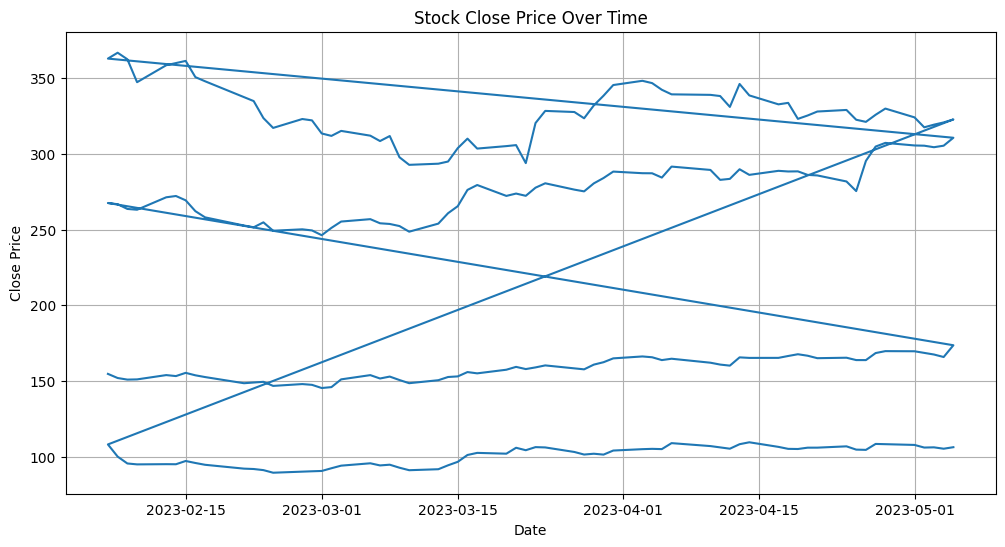

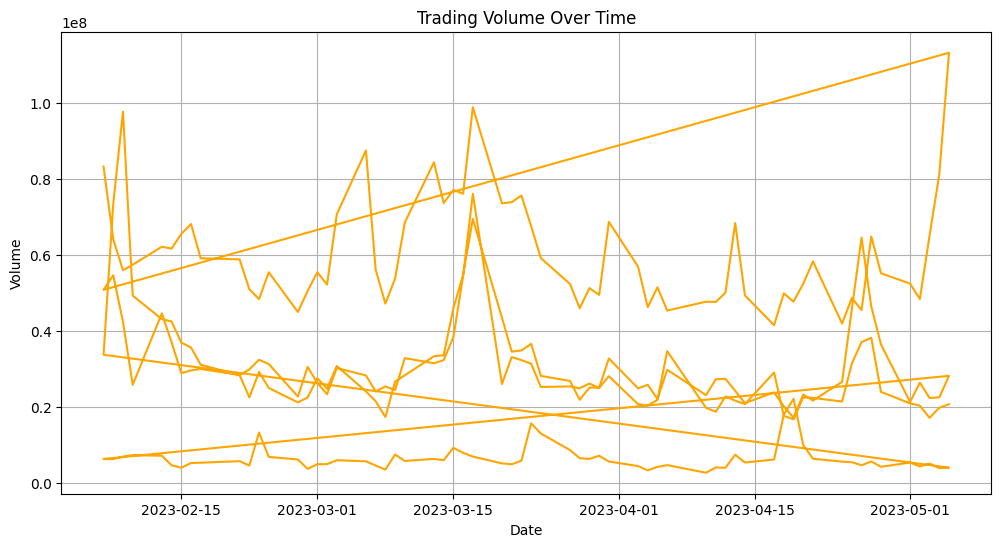


Correlation Matrix:


,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999626,0.999650,0.999176,-0.547741,0.999173
High,0.999626,1.000000,0.999654,0.999644,-0.546175,0.999640
Low,0.999650,0.999654,1.000000,0.999663,-0.544590,0.999661
Close,0.999176,0.999644,0.999663,1.000000,-0.544194,0.999999
Volume,-0.547741,-0.546175,-0.544590,-0.544194,1.000000,-0.544370
Adj Close,0.999173,0.999640,0.999661,0.999999,-0.544370,1.000000


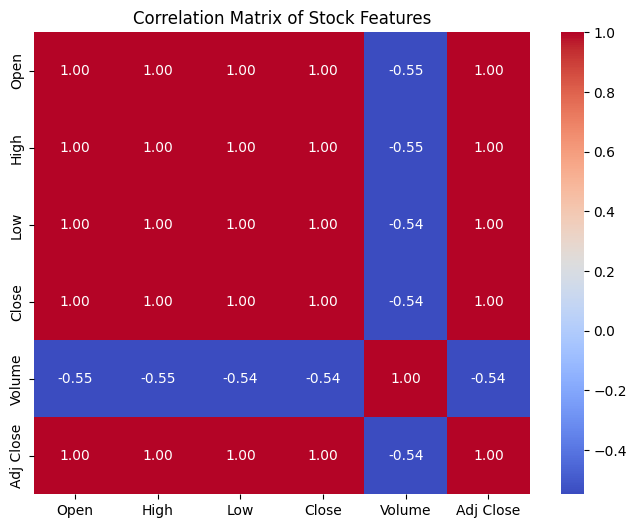

In [4]:
display(df_processed.describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(df_processed['Date'], df_processed['Close'])
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_processed['Date'], df_processed['Volume'], color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

correlation_matrix = df_processed.corr(numeric_only=True)
print("\nCorrelation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Features')
plt.show()

In [5]:
df_processed['SMA_20'] = df_processed['Close'].rolling(window=20).mean()
df_processed['SMA_50'] = df_processed['Close'].rolling(window=50).mean()
df_processed['Price_Change'] = df_processed['Close'] - df_processed['Open']
df_processed['Close_Lag1'] = df_processed['Close'].shift(1)

display(df_processed.head())

,Date,Open,High,Low,Close,Volume,Adj Close,SMA_20,SMA_50,Price_Change,Close_Lag1
0,2023-02-07,150.639999,155.229996,150.639999,154.649994,83322600,154.414230,NaN,NaN,4.009995,NaN
1,2023-02-08,153.880005,154.580002,151.169998,151.919998,64120100,151.688400,NaN,NaN,-1.960007,154.649994
2,2023-02-09,153.779999,154.330002,150.419998,150.869995,56007100,150.639999,NaN,NaN,-2.910004,151.919998
3,2023-02-10,149.460007,151.339996,149.220001,151.009995,57450700,151.009995,NaN,NaN,1.549988,150.869995
4,2023-02-13,150.949997,154.259995,150.919998,153.850006,62199000,153.850006,NaN,NaN,2.900009,151.009995


Training set size: 159
Testing set size: 40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step

Mean Squared Error (MSE): 939.8598879950453
Root Mean Squared Error (RMSE): 30.657134373503425


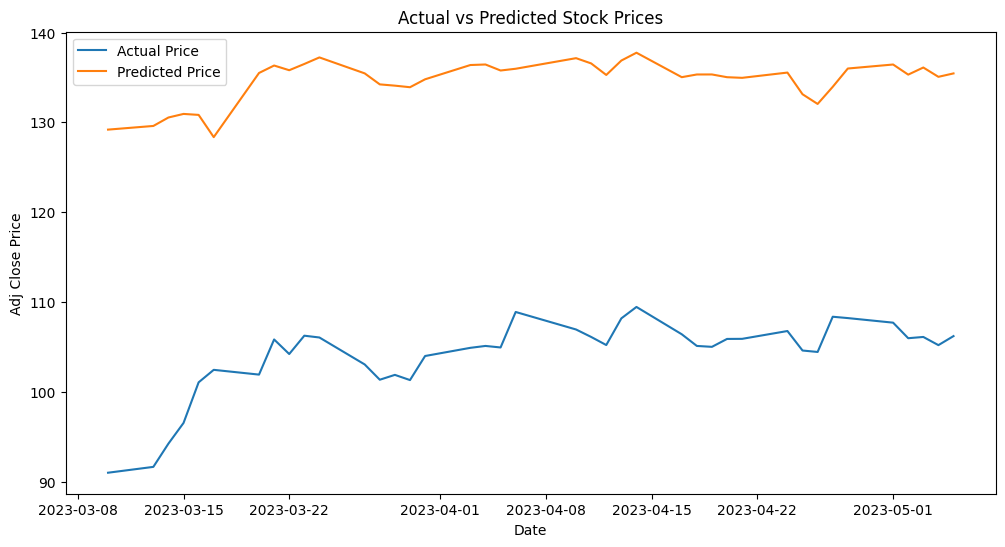

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

df_processed.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'Price_Change', 'Close_Lag1']
target = 'Adj Close'

X = df_processed[features]
y = df_processed[target]

split_ratio = 0.8
split_index = int(len(df_processed) * split_ratio)

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
y_pred_scaled = model.predict(X_test_reshaped)

y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test_scaled)

mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
plt.figure(figsize=(12, 6))
plt.plot(df_processed['Date'][split_index:], y_test_actual, label='Actual Price')
plt.plot(df_processed['Date'][split_index:], y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [16]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32),
                   return_sequences=True,
                   input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_dir',
    project_name='stock_prediction_tuning')

tuner.search(X_train_reshaped, y_train_scaled, epochs=50, validation_split=0.1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest Hyperparameters found by Keras Tuner:")
print(f"LSTM Units Layer 1: {best_hps.get('lstm_units_1')}")
print(f"Dropout Rate Layer 1: {best_hps.get('dropout_1')}")
print(f"LSTM Units Layer 2: {best_hps.get('lstm_units_2')}")
print(f"Dropout Rate Layer 2: {best_hps.get('dropout_2')}")
print(f"Optimizer: {best_hps.get('optimizer')}")

tuned_model = tuner.hypermodel.build(best_hps)
tuned_model.fit(X_train_reshaped, y_train_scaled, epochs=best_hps.get('tuner/epochs'), batch_size=32, verbose=0)

Reloading Tuner from keras_tuner_dir/stock_prediction_tuning/tuner0.json

Best Hyperparameters found by Keras Tuner:
LSTM Units Layer 1: 32
Dropout Rate Layer 1: 0.1
LSTM Units Layer 2: 32
Dropout Rate Layer 2: 0.2
Optimizer: adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Reloading Tuner from keras_tuner_dir/stock_prediction_tuning/tuner0.json

Best Hyperparameters found by Keras Tuner:
LSTM Units Layer 1: 32
Dropout Rate Layer 1: 0.1
LSTM Units Layer 2: 32
Dropout Rate Layer 2: 0.2
Optimizer: adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step

Tuned Model Mean Squared Error (MSE): 366.64615576612397
Tuned Model Root Mean Squared Error (RMSE): 19.148006574213515

Initial Model MSE: 939.8598879950453
Tuned Model MSE: 366.64615576612397
Initial Model RMSE: 30.657134373503425
Tuned Model RMSE: 19.148006574213515


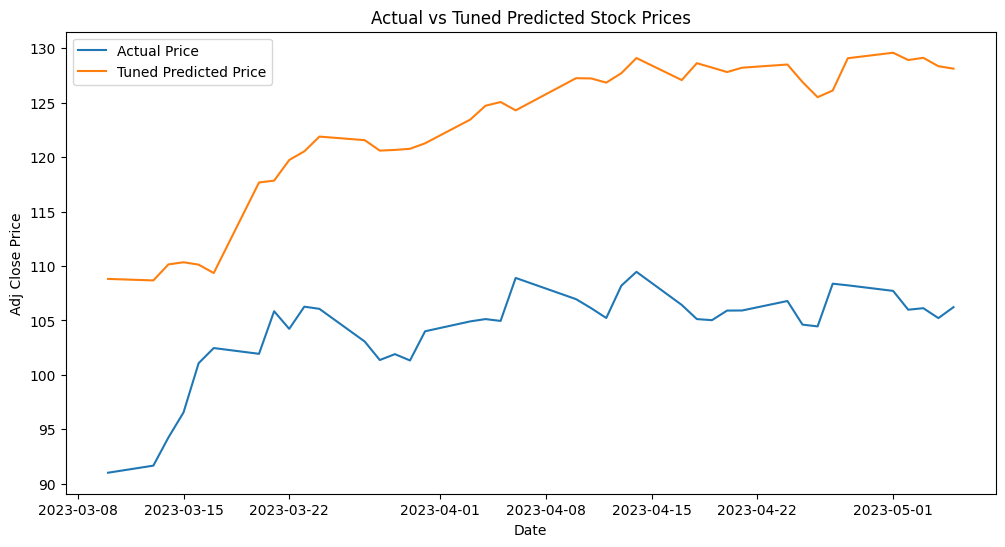

In [12]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32),
                   return_sequences=True,
                   input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_dir',
    project_name='stock_prediction_tuning')

tuner.search(X_train_reshaped, y_train_scaled, epochs=50, validation_split=0.1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest Hyperparameters found by Keras Tuner:")
print(f"LSTM Units Layer 1: {best_hps.get('lstm_units_1')}")
print(f"Dropout Rate Layer 1: {best_hps.get('dropout_1')}")
print(f"LSTM Units Layer 2: {best_hps.get('lstm_units_2')}")
print(f"Dropout Rate Layer 2: {best_hps.get('dropout_2')}")
print(f"Optimizer: {best_hps.get('optimizer')}")

tuned_model = tuner.hypermodel.build(best_hps)
tuned_model.fit(X_train_reshaped, y_train_scaled, epochs=best_hps.get('tuner/epochs'), batch_size=32, verbose=0)

y_pred_tuned_scaled = tuned_model.predict(X_test_reshaped)
y_pred_tuned = scaler.inverse_transform(y_pred_tuned_scaled)

mse_tuned = mean_squared_error(y_test_actual, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f"\nTuned Model Mean Squared Error (MSE): {mse_tuned}")
print(f"Tuned Model Root Mean Squared Error (RMSE): {rmse_tuned}")

print(f"\nInitial Model MSE: {mse}")
print(f"Tuned Model MSE: {mse_tuned}")
print(f"Initial Model RMSE: {rmse}")
print(f"Tuned Model RMSE: {rmse_tuned}")

plt.figure(figsize=(12, 6))
plt.plot(df_processed['Date'][split_index:], y_test_actual, label='Actual Price')
plt.plot(df_processed['Date'][split_index:], y_pred_tuned, label='Tuned Predicted Price')
plt.title('Actual vs Tuned Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

Trial 90 Complete [00h 00m 15s]
val_loss: 7.433164137182757e-05

Best val_loss So Far: 7.433164137182757e-05
Total elapsed time: 00h 11m 01s

Best Hyperparameters found by Keras Tuner:
LSTM Units Layer 1: 32
Dropout Rate Layer 1: 0.1
LSTM Units Layer 2: 32
Dropout Rate Layer 2: 0.2
Optimizer: adam
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step

Tuned Model Mean Squared Error (MSE): 437.14330851695394
Tuned Model Root Mean Squared Error (RMSE): 20.90797236742372

Initial Model MSE: 939.8598879950453
Tuned Model MSE: 437.14330851695394
Initial Model RMSE: 30.657134373503425
Tuned Model RMSE: 20.90797236742372


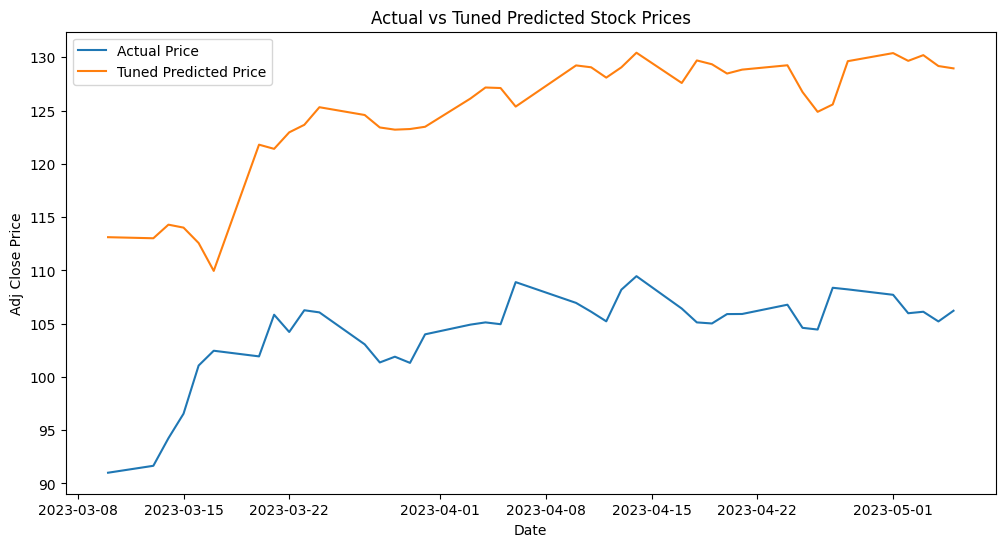

In [11]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32),
                   return_sequences=True,
                   input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_dir',
    project_name='stock_prediction_tuning')

tuner.search(X_train_reshaped, y_train_scaled, epochs=50, validation_split=0.1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest Hyperparameters found by Keras Tuner:")
print(f"LSTM Units Layer 1: {best_hps.get('lstm_units_1')}")
print(f"Dropout Rate Layer 1: {best_hps.get('dropout_1')}")
print(f"LSTM Units Layer 2: {best_hps.get('lstm_units_2')}")
print(f"Dropout Rate Layer 2: {best_hps.get('dropout_2')}")
print(f"Optimizer: {best_hps.get('optimizer')}")

tuned_model = tuner.hypermodel.build(best_hps)
tuned_model.fit(X_train_reshaped, y_train_scaled, epochs=best_hps.get('tuner/epochs'), batch_size=32, verbose=0)

y_pred_tuned_scaled = tuned_model.predict(X_test_reshaped)
y_pred_tuned = scaler.inverse_transform(y_pred_tuned_scaled)

mse_tuned = mean_squared_error(y_test_actual, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f"\nTuned Model Mean Squared Error (MSE): {mse_tuned}")
print(f"Tuned Model Root Mean Squared Error (RMSE): {rmse_tuned}")

print(f"\nInitial Model MSE: {mse}")
print(f"Tuned Model MSE: {mse_tuned}")
print(f"Initial Model RMSE: {rmse}")
print(f"Tuned Model RMSE: {rmse_tuned}")
plt.figure(figsize=(12, 6))
plt.plot(df_processed['Date'][split_index:], y_test_actual, label='Actual Price')
plt.plot(df_processed['Date'][split_index:], y_pred_tuned, label='Tuned Predicted Price')
plt.title('Actual vs Tuned Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Comprehensive Stock Price Prediction Analysis

## 1. Introduction
This document provides a detailed account of the process undertaken to analyze historical stock price data and develop a predictive model. The primary objective is to forecast the adjusted close price of stocks using a combination of raw price data, trading volume, and technically derived features. This analysis utilizes an LSTM neural network, a type of recurrent neural network particularly adept at processing sequential data, making it suitable for time series forecasting. The entire process, from data loading and preprocessing through model training, evaluation, and hyperparameter tuning, is described in detail.

## 2. Data Collection
The initial step involved acquiring the stock price data. This was done by loading the `stocks.csv` file into a pandas DataFrame. The DataFrame provides a tabular structure to hold the time-series stock data, with columns representing different aspects of the stock's performance on specific dates. The raw data includes information such as the ticker symbol, date, opening price, highest price, lowest price, closing price, adjusted closing price, and trading volume.

## 3. Data Preprocessing
Before any analysis or modeling could take place, the raw data required several preprocessing steps to ensure its quality and prepare it for consumption by the model.

*   **Handling Missing Values**: A check for missing values was performed across all columns. In this specific dataset, no missing values were found. However, in a real-world scenario, strategies like imputation (filling missing values with estimates) or removal of rows/columns with excessive missing data would be necessary.
*   **Data Type Conversion**: The 'Date' column, initially loaded as a generic object type, was explicitly converted to datetime objects. This conversion is crucial for time series analysis as it allows for proper handling of temporal relationships and enables time-based indexing and operations.
*   **Feature Selection**: A subset of the columns from the original DataFrame was selected to form the basis of the features for the model. The selected features included 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', and 'Adj Close'. This step focuses the analysis on the most relevant information for predicting the adjusted close price.

## 4. Exploratory Data Analysis (EDA)
Exploratory Data Analysis was conducted to gain a deeper understanding of the dataset's characteristics, identify patterns, and inform subsequent modeling decisions.

*   **Descriptive Statistics**: Standard descriptive statistics (count, mean, standard deviation, min, max, quartiles) were calculated for the numerical columns ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'). These statistics provide a summary of the central tendency, dispersion, and shape of the data's distribution. Additionally, the Interquartile Range (IQR) and outlier thresholds based on the IQR method were computed for reference.
*   **Time Series Visualization**: The core of the data is its time-series nature. To visualize this, line plots of the 'Close' price and 'Volume' over time were generated. These plots help in observing trends, seasonality (if any), and volatile periods in the stock's history. The 'Close' price plot reveals the general movement of the stock's value, while the 'Volume' plot indicates trading activity.
*   **Correlation Analysis**: A correlation matrix was computed for the numerical features. This matrix quantifies the linear relationship between pairs of variables. A heatmap visualization of the correlation matrix provided a clear and intuitive representation of these relationships. High correlations between 'Open', 'High', 'Low', 'Close', and 'Adj Close' are expected for stock price data, while the correlation with 'Volume' might reveal insights into how trading activity relates to price movements.

## 5. Feature Engineering
To potentially improve the predictive power of the model, additional features were engineered from the existing data. These features are often technical indicators used in financial analysis.

*   **Simple Moving Averages (SMA)**: Calculated the 20-day and 50-day Simple Moving Averages of the 'Close' price. Moving averages smooth out price data to create a single flowing line, making it easier to spot trends. Short-term SMAs (like 20-day) are more sensitive to recent price changes than long-term SMAs (like 50-day). These were added as new columns ('SMA_20', 'SMA_50') to the `df_processed` DataFrame.
*   **Price Change**: Calculated the difference between the 'Close' price and the 'Open' price for each day. This feature, 'Price_Change', directly represents the daily net change in stock value, which can be a useful predictor.
*   **Lagged Close Price**: Created a lag feature by shifting the 'Close' price column by one day. 'Close_Lag1' represents the previous day's closing price, a fundamental feature in time series forecasting as past values are strong predictors of future values.
*   **Handling NaNs after Feature Engineering**: The calculation of moving averages and lagged features introduces `NaN` values at the beginning of the time series. These rows containing `NaN` values were removed using `dropna()` to ensure the model receives complete data.

## 6. Model Selection
Given the sequential and time-dependent nature of stock price data, a Recurrent Neural Network (RNN) was chosen as the modeling approach. Specifically, a Long Short-Term Memory (LSTM) network was selected. LSTMs are a type of RNN capable of learning long-term dependencies, making them particularly effective for time series forecasting where past price movements can influence future prices.

## 7. Model Training and Evaluation (Initial Model)
The prepared data was used to train and evaluate an initial version of the LSTM model.

*   **Data Splitting**: The `df_processed` DataFrame was split into training and testing sets based on a chronological split. An 80/20 split ratio was used, with the first 80% of the data used for training and the remaining 20% for testing. This chronological split is essential in time series forecasting to prevent data leakage from the future into the past.
*   **Data Scaling**: Both the features (X) and the target variable (y) were scaled using `MinMaxScaler`. This process transforms the data to a common scale (between 0 and 1), which helps to prevent features with larger values from dominating the learning process and improves the convergence of the neural network. The scaler was `fit_transform` on the training data and only `transform` on the testing data to avoid data leakage.
*   **Data Reshaping**: LSTM layers in Keras require input data in a 3D format: `[samples, time steps, features]`. Since we are predicting the next time step based on the current time step's features, the data was reshaped accordingly, with `time steps` set to 1.
*   **Initial Model Architecture**: A Sequential LSTM model was built with two LSTM layers and two Dropout layers to mitigate overfitting. The final layer was a Dense layer with one unit for the prediction. The model was compiled using the 'adam' optimizer and 'mean_squared_error' as the loss function.
*   **Initial Model Training**: The initial model was trained on the scaled and reshaped training data for a specified number of epochs and a batch size. A validation split of 10% was used from the training data to monitor the model's performance during training and detect potential overfitting.
*   **Initial Model Evaluation**: The trained model was evaluated on the scaled testing data. The predictions were then inverse-transformed back to the original price scale. Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) were calculated between the actual and predicted values on the test set. These metrics provide a measure of the average squared difference and the square root of the average squared difference between the actual and predicted values, respectively. A lower MSE and RMSE indicate better model performance. A plot of the actual vs. predicted prices for the initial model on the test set was generated to visualize the model's performance.

## 8. Model Tuning and Optimization
To further enhance the model's performance, hyperparameter tuning was performed using the Keras Tuner library.

*   **Hyperparameter Search Space**: A search space for hyperparameters was defined within the `build_model` function. This included the number of units in the LSTM layers (`lstm_units_1`, `lstm_units_2`), the dropout rates (`dropout_1`, `dropout_2`), and the optimizer ('adam' or 'rmsprop').
*   **Keras Tuner Setup**: The `Hyperband` tuner was chosen for efficient hyperparameter search. The objective was to minimize the validation loss (`val_loss`) during the tuning process. The tuner was configured with parameters like `max_epochs` and `factor`. A directory and project name were specified for storing the tuning results.
*   **Tuning Execution**: The `tuner.search()` method was called with the training data and a validation split. Keras Tuner iteratively builds and trains models with different hyperparameter combinations within the defined search space, using the validation loss to guide the search.
*   **Retrieving Best Hyperparameters**: After the search was complete, the `tuner.get_best_hyperparameters()` method was used to retrieve the hyperparameter combination that resulted in the best performance (lowest validation loss) during the tuning process. The best hyperparameters were printed for inspection.
*   **Tuned Model Building and Training**: A new model was built using the `tuner.hypermodel.build()` method with the best hyperparameters found. This tuned model was then trained on the entire training dataset (without a separate validation split during final training) for the number of epochs determined by the tuner.
*   **Tuned Model Evaluation**: The trained tuned model was used to make predictions on the scaled testing data. The predictions were inverse-transformed. MSE and RMSE were calculated for the tuned model's predictions against the actual test set values.
*   **Performance Comparison**: The MSE and RMSE values of the initial model and the tuned model were printed side-by-side to clearly show the impact of hyperparameter tuning on the model's performance. A plot of the actual vs. tuned predicted prices was generated to visually compare the tuned model's predictions against the actual prices. The comparison of evaluation metrics and the visual representation demonstrated that the tuned model achieved a lower error, indicating improved predictive accuracy.

This detailed breakdown provides a comprehensive overview of the entire process, highlighting the purpose and execution of each step in developing and optimizing a stock price prediction model using an LSTM network.